In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from src import get_data, clean_data, add_features

sns.set(style="whitegrid")
sns.set_context("notebook", font_scale = 1.5)

In [3]:
# data preprocessing
path = 'https://github.com/EuMentality/datasets/raw/main/taxi_trip.csv'
df = get_data(path)

In [4]:
df.shape

(1458644, 11)

**clean data**

In [5]:
df = clean_data(df)

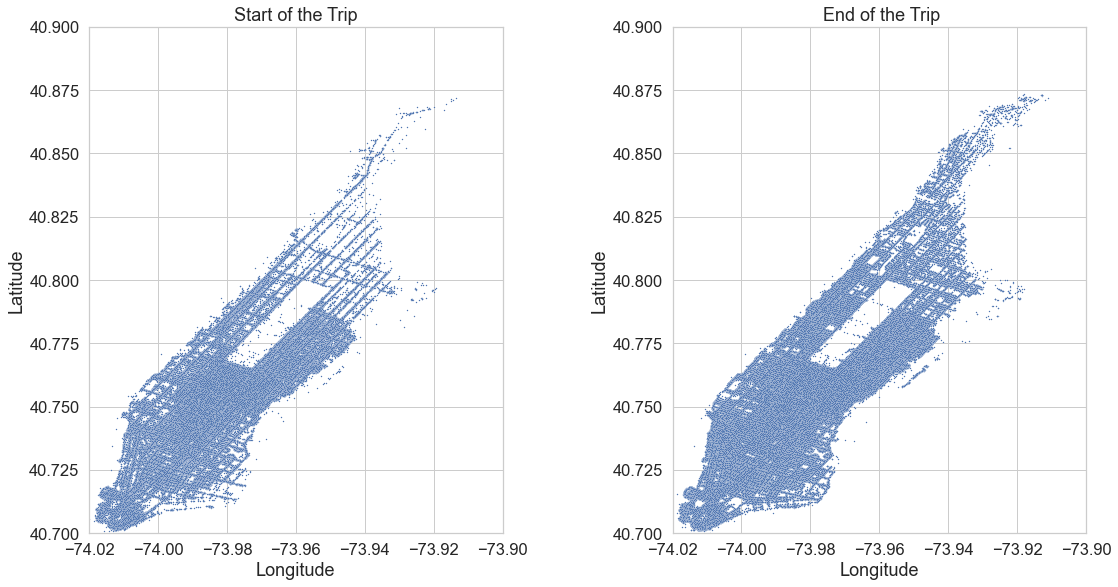

In [20]:
# Scatter Plot for Start/End trip 
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.tight_layout(w_pad=7)
long_lat_set = [('pickup_longitude', 'pickup_latitude'), ('dropoff_longitude', 'dropoff_latitude')]
scatter_name = ['Start of the Trip', ' End of the Trip']
for k, ((longitude, latitude), ax_name) in enumerate(zip(long_lat_set, scatter_name)):
    sns.scatterplot(x=df[longitude], y=df[latitude], s=2, ax=axes[k])
    axes[k].set_title(ax_name)
    axes[k].set_xlabel('Longitude')
    axes[k].set_ylabel('Latitude')
    axes[k].set_ylim(40.70, 40.90)
    axes[k].set_xlim(-74.02,-73.90)

**add features**

In [24]:
df_1 = add_features(df, path_kmeans='../model/kmeans.pkl', purpose='tuning')
df_2 = add_features(df, path_kmeans='../model/kmeans.pkl')

In [27]:
df_1.shape

(567504, 13)

In [28]:
df_2.shape

(567504, 12)